In [108]:
print("hello there")

hello there


In [178]:
#pip install featuretools

SyntaxError: invalid syntax (<ipython-input-178-eb583f9d7aad>, line 2)

In [179]:
#pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [181]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [182]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# featuretools for automated feature engineering
import featuretools as ft

# matplotlit and seaborn for visualizations
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# modeling 
import lightgbm as lgb

# utilities
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# memory management
import gc

ImportError: cannot import name 'get_config' from 'sklearn' (unknown location)

AttributeError: 'numpy.int64' object has no attribute 'plot'

<Figure size 432x288 with 0 Axes>

In [120]:
import pandas as pd
import numpy as np

In [121]:
df_train = pd.read_csv('../data/raw/application_train.csv')
df_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
df_test = pd.read_csv('../data/raw/application_test.csv')
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


<AxesSubplot:ylabel='Frequency'>

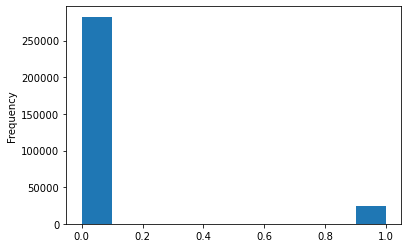

In [123]:
df_train['TARGET'].astype(int).plot.hist()

In [124]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = df_train.corr().abs()
corr_matrix.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,0.002108,0.001129,0.001820,0.000343,0.000433,0.000232,0.000849,0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,0.002672,0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,0.002108,1.000000,0.019187,0.003982,0.030369,0.012817,0.039645,0.037227,0.078239,0.044932,...,0.007952,0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,0.012462,0.002022,0.019930
CNT_CHILDREN,0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,0.001827,0.025573,0.330938,0.239818,...,0.004031,0.000864,0.000988,0.002450,0.000410,0.000366,0.002436,0.010808,0.007836,0.041550
AMT_INCOME_TOTAL,0.001820,0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,0.064223,...,0.003130,0.002408,0.000242,0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,0.000343,0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,0.055436,0.066838,...,0.034329,0.021082,0.031023,0.016148,0.003906,0.004238,0.001275,0.054451,0.015925,0.048448


In [125]:

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,NaN,0.002108,0.001129,0.001820,0.000343,0.000433,0.000232,0.000849,0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,0.002672,0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,NaN,NaN,0.019187,0.003982,0.030369,0.012817,0.039645,0.037227,0.078239,0.044932,...,0.007952,0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,0.012462,0.002022,0.019930
CNT_CHILDREN,NaN,NaN,NaN,0.012882,0.002145,0.021374,0.001827,0.025573,0.330938,0.239818,...,0.004031,0.000864,0.000988,0.002450,0.000410,0.000366,0.002436,0.010808,0.007836,0.041550
AMT_INCOME_TOTAL,NaN,NaN,NaN,NaN,0.156870,0.191657,0.159610,0.074796,0.027261,0.064223,...,0.003130,0.002408,0.000242,0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,NaN,NaN,NaN,NaN,NaN,0.770138,0.986968,0.099738,0.055436,0.066838,...,0.034329,0.021082,0.031023,0.016148,0.003906,0.004238,0.001275,0.054451,0.015925,0.048448


In [126]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 35 columns to remove.


In [127]:
df_train = df_train.drop(columns = to_drop)
df_test = df_test.drop(columns = to_drop)

print('Training shape: ', df_train.shape)
print('Testing shape: ', df_test.shape)

Training shape:  (307511, 87)
Testing shape:  (48744, 86)


In [151]:
train_missing = (df_train.isnull().sum() / len(df_train)).sort_values(ascending = False)
train_missing.head()

LANDAREA_AVG         0.593767
BASEMENTAREA_AVG     0.585160
EXT_SOURCE_1         0.563811
NONLIVINGAREA_AVG    0.551792
ELEVATORS_AVG        0.532960
dtype: float64

In [152]:
test_missing = (df_test.isnull().sum() / len(df_test)).sort_values(ascending = False)
test_missing.head()

LANDAREA_AVG         0.579641
BASEMENTAREA_AVG     0.567065
NONLIVINGAREA_AVG    0.535122
ELEVATORS_AVG        0.516761
APARTMENTS_AVG       0.490050
dtype: float64

In [153]:
train_missing = train_missing.index[train_missing > 0.60]
test_missing = test_missing.index[test_missing > 0.60]

all_missing = list(set(set(train_missing) | set(test_missing)))
print('There are %d columns with more than 60%% missing values' % len(all_missing))

There are 0 columns with more than 60% missing values


In [154]:
train_labels = df_train["TARGET"]
train_ids = df_train['SK_ID_CURR']
test_ids = df_test['SK_ID_CURR']

df_train = pd.get_dummies(df_train.drop(columns = all_missing))
df_test = pd.get_dummies(df_test.drop(columns = all_missing))

df_train, df_test = df_train.align(df_test, join = 'inner', axis = 1)

print('Training set full shape: ', df_train.shape)
print('Testing set full shape: ' , df_test.shape)

Training set full shape:  (307511, 198)
Testing set full shape:  (48744, 198)


In [155]:
df_train = df_train.drop(columns = ['SK_ID_CURR'])
df_test = df_test.drop(columns = ['SK_ID_CURR'])

In [156]:
df_train

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,-2120,1,...,0,0,0,0,0,0,1,0,1,0
1,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,-291,1,...,0,1,0,0,0,0,0,0,1,0
2,0,67500.0,135000.0,6750.0,0.010032,-19046,-225,-4260.0,-2531,1,...,0,0,0,0,0,0,0,0,0,0
3,0,135000.0,312682.5,29686.5,0.008019,-19005,-3039,-9833.0,-2437,1,...,0,0,0,0,0,0,0,0,0,0
4,0,121500.0,513000.0,21865.5,0.028663,-19932,-3038,-4311.0,-3458,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,0.032561,-9327,-236,-8456.0,-1982,1,...,0,0,0,0,0,0,1,0,1,0
307507,0,72000.0,269550.0,12001.5,0.025164,-20775,365243,-4388.0,-4090,1,...,0,0,0,0,0,0,1,0,1,0
307508,0,153000.0,677664.0,29979.0,0.005002,-14966,-7921,-6737.0,-5150,1,...,0,0,0,0,0,1,0,0,1,0
307509,0,171000.0,370107.0,20205.0,0.005313,-11961,-4786,-2562.0,-931,1,...,0,0,0,0,0,0,1,0,1,0


In [158]:
train = df_train
test = df_test

In [164]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [172]:
pip install -U scikit-learn

  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
Note: you may need to restart the kernel to use updated packages.


In [184]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [186]:
pip install sklearn.cross_validation

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: none)
ERROR: No matching distribution found for sklearn.cross_validation


In [174]:
import lightgbm as lgb
feature_importances = np.zeros(train.shape[1])

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

LightGBMError: Scikit-learn is required for this module

In [187]:
# Stacking Starter based on Allstate Faron's Script
#https://www.kaggle.com/mmueller/allstate-claims-severity/stacking-starter/run/390867
# Preprocessing from ogrellier
#https://www.kaggle.com/ogrellier/good-fun-with-ligthgbm

import pandas as pd
import numpy as np
from scipy.stats import skew
import xgboost as xgb
from sklearn.cross_validation import KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from math import sqrt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import gc

NFOLDS = 3
SEED = 0
NROWS = None

data = pd.read_csv('../input/application_train.csv')
test = pd.read_csv('../input/application_test.csv')
prev = pd.read_csv('../input/previous_application.csv')

# print('%-55s | %7s | %10s | %10s | %10s' 
#       % ('FEATURES', 'TYPE', 'NB VALUES', 'NB NaNS', 'NaNs (%)'))
# for f_ in data: # .dtypes
#     print("%-55s | %7s | %10s | %10s |    %5.2f"
#           % (f_, str(data[f_].dtype), 
#              str(len(data[f_].value_counts(dropna=False))), 
#              str(data[f_].isnull().sum()),
#              100 * data[f_].isnull().sum() / data.shape[0]
#             )
#          )
         
categorical_feats = [
    f for f in data.columns if data[f].dtype == 'object'
]

for f_ in categorical_feats:
    data[f_], indexer = pd.factorize(data[f_])
    test[f_] = indexer.get_indexer(test[f_])
    
gc.enable()

y_train = data['TARGET']
del data['TARGET']

###################################
# PLEASE DON'T DO THIS AT HOME LOL
# Averaging factorized categorical features defeats my own reasoning
################################### 
prev_cat_features = [
    f_ for f_ in prev.columns if prev[f_].dtype == 'object'
]
for f_ in prev_cat_features:
    prev[f_], _ = pd.factorize(prev[f_])
    
avg_prev = prev.groupby('SK_ID_CURR').mean()
cnt_prev = prev[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
avg_prev['nb_app'] = cnt_prev['SK_ID_PREV']
del avg_prev['SK_ID_PREV']

x_train = data.merge(right=avg_prev.reset_index(), how='left', on='SK_ID_CURR')
x_test = test.merge(right=avg_prev.reset_index(), how='left', on='SK_ID_CURR')

x_train = x_train.fillna(0)
x_test= x_test.fillna(0)

ntrain = x_train.shape[0]
ntest = x_test.shape[0]

excluded_feats = ['SK_ID_CURR']
features = [f_ for f_ in x_train.columns if f_ not in excluded_feats]

x_train = x_train[features]
x_test = x_test[features]

kf = KFold(n_splits = NFOLDS, shuffle=True, random_state=SEED)

class SklearnWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict_proba(x)[:,1]

class CatboostWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_seed'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict_proba(x)[:,1]
        
class LightGBMWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['feature_fraction_seed'] = seed
        params['bagging_seed'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict_proba(x)[:,1]


class XgbWrapper(object):
    def __init__(self, seed=0, params=None):
        self.param = params
        self.param['seed'] = seed
        self.nrounds = params.pop('nrounds', 250)

    def train(self, x_train, y_train):
        dtrain = xgb.DMatrix(x_train, label=y_train)
        self.gbdt = xgb.train(self.param, dtrain, self.nrounds)

    def predict(self, x):
        return self.gbdt.predict(xgb.DMatrix(x))


def get_oof(clf):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train.loc[train_index]
        y_tr = y_train.loc[train_index]
        x_te = x_train.loc[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)


et_params = {
    'n_jobs': 16,
    'n_estimators': 200,
    'max_features': 0.5,
    'max_depth': 12,
    'min_samples_leaf': 2,
}

rf_params = {
    'n_jobs': 16,
    'n_estimators': 200,
    'max_features': 0.2,
    'max_depth': 12,
    'min_samples_leaf': 2,
}

xgb_params = {
    'seed': 0,
    'colsample_bytree': 0.7,
    'silent': 1,
    'subsample': 0.7,
    'learning_rate': 0.075,
    'objective': 'binary:logistic',
    'max_depth': 4,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'nrounds': 200
}

catboost_params = {
    'iterations': 200,
    'learning_rate': 0.5,
    'depth': 3,
    'l2_leaf_reg': 40,
    'bootstrap_type': 'Bernoulli',
    'subsample': 0.7,
    'scale_pos_weight': 5,
    'eval_metric': 'AUC',
    'od_type': 'Iter',
    'allow_writing_files': False
}

lightgbm_params = {
    'n_estimators':200,
    'learning_rate':0.1,
    'num_leaves':123,
    'colsample_bytree':0.8,
    'subsample':0.9,
    'max_depth':15,
    'reg_alpha':0.1,
    'reg_lambda':0.1,
    'min_split_gain':0.01,
    'min_child_weight':2    
}

xg = XgbWrapper(seed=SEED, params=xgb_params)
et = SklearnWrapper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
rf = SklearnWrapper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
cb = CatboostWrapper(clf= CatBoostClassifier, seed = SEED, params=catboost_params)
lg = LightGBMWrapper(clf = LGBMClassifier, seed = SEED, params = lightgbm_params)

xg_oof_train, xg_oof_test = get_oof(xg)
et_oof_train, et_oof_test = get_oof(et)
rf_oof_train, rf_oof_test = get_oof(rf)
cb_oof_train, cb_oof_test = get_oof(cb)

print("XG-CV: {}".format(sqrt(mean_squared_error(y_train, xg_oof_train))))
print("ET-CV: {}".format(sqrt(mean_squared_error(y_train, et_oof_train))))
print("RF-CV: {}".format(sqrt(mean_squared_error(y_train, rf_oof_train))))
print("RF-CV: {}".format(sqrt(mean_squared_error(y_train, cb_oof_train))))

x_train = np.concatenate((xg_oof_train, et_oof_train, rf_oof_train, cb_oof_train), axis=1)
x_test = np.concatenate((xg_oof_test, et_oof_test, rf_oof_test, cb_oof_test), axis=1)

print("{},{}".format(x_train.shape, x_test.shape))

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)

test['TARGET'] = logistic_regression.predict_proba(x_test)[:,1]

test[['SK_ID_CURR', 'TARGET']].to_csv('first_submission.csv', index=False, float_format='%.8f')

ModuleNotFoundError: No module named 'sklearn.cross_validation'